<a href="https://colab.research.google.com/github/keithferns98/UnsupervisedLearning/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [81]:
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
df=pd.read_csv('countries_geodata.csv',sep='\t')
df.head()

FileNotFoundError: ignored

In [ ]:
df.dtypes

In [83]:
df.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [84]:
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [85]:
df=df.dropna()

In [86]:
df.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [87]:
df.columns

Index(['Age', 'Income', 'SpendingScore', 'Savings'], dtype='object')

In [88]:
df.shape

(505, 4)

In [89]:
plt.scatter(df['longitude'],df['latitude'])

KeyError: ignored

#WORKING WITH KMEANS

In [ ]:
from sklearn.cluster import KMeans
#7 continents in the world
#so k=7
km=KMeans(n_clusters=7)

In [ ]:
#Prep ur data
xfeatures=df[['longitude','latitude']]

In [ ]:
#fit n predict
clusters=km.fit_predict(xfeatures)

In [ ]:
#Get all the labels
km.labels_

In [90]:
 clusters

NameError: ignored

In [ ]:
clusters in km.labels_

In [ ]:
km.cluster_centers_

In [ ]:
df['Cluster_continents']=clusters

In [ ]:
df.head()

In [91]:
#plot of cluster
plt.scatter(df['longitude'],df['latitude'],c=df['Cluster_continents'],cmap='rainbow')

KeyError: ignored

In [ ]:
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes

In [ ]:
!pip install geopandas

In [ ]:
#World Map
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax=world.plot(figsize=(20,10))
ax.axis('off')

#Overlay our clusters onto the map

In [92]:
g01=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['longitude'],df['latitude']))

NameError: ignored

In [ ]:
g01

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))
g01.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['longitude'],df['latitude'],c=df['Cluster_continents'],cmap='rainbow')
plt.show()

In [93]:
continent_dic={'SouthAmerica':2,'Nort','Asia':0,'Australasia':4,'Europe':1}

SyntaxError: ignored

In [ ]:
df[df['Cluster_continents']==2]

In [ ]:
##Scale
from sklearn.preprocessing import StandardScaler 
x_scaled=StandardScaler().fit_transform(xfeatures)
x_scaled

In [ ]:
km2=KMeans(n_clusters=7)
new_clusters=km2.fit_predict(x_scaled)

In [ ]:
df_scaled=df
df_scaled['cluster']=new_clusters

In [ ]:
df_scaled

In [ ]:
plt.scatter(df['longitude'],df['latitude'],c=df['cluster'],cmap='rainbow')

In [ ]:
new_df1=pd.DataFrame(x_scaled,columns=['longitude','latitude'])
new_df1['name']=df['name']
new_df1['cluster']=new_clusters

In [ ]:
new_df1.head()

In [ ]:
plt.scatter(new_df1['longitude'],new_df1['latitude'],c=new_df1['cluster'],cmap='rainbow')

In [ ]:
g01=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df['longitude'],df['latitude']))
fig,ax=plt.subplots(figsize=(20,10))
g01.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
g02=gpd.GeoDataFrame(new_df1,geometry=gpd.points_from_xy(new_df1['longitude'],new_df1['latitude']))
fig,ax=plt.subplots(figsize=(20,10))
g02.plot(cmap='rainbow',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [ ]:
#Task 2


In [ ]:
df_cust=pd.read_csv('jewellery.csv')
df_cust.head()

In [94]:
#DTypes
df_cust.dtypes

Age                int64
Income             int64
SpendingScore    float64
Savings          float64
clusters           int32
dtype: object

In [95]:
df_cust.describe()

,Age,Income,SpendingScore,Savings,clusters
count,505.000000,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867,1.302970
std,24.140043,35992.922184,0.259634,4949.229253,1.039541
min,17.000000,12000.000000,0.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702,0.000000
50%,59.000000,75078.000000,0.368215,14209.932802,1.000000
75%,85.000000,107100.000000,0.768279,16047.268331,2.000000
max,97.000000,142000.000000,1.000000,20000.000000,3.000000


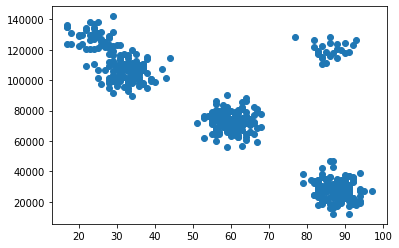

In [96]:
plt.scatter(df_cust['Age'],df_cust['Income'])

In [97]:
#Groups based on Age and Income


ELbow Method

In [98]:
sum_of_sqr_distance=[]
k_range=range(1,15)
for k in k_range:
    km_model2=KMeans(n_clusters=k)
    km_model2.fit(df_cust)
    sum_of_sqr_distance.append(km_model2.inertia_)


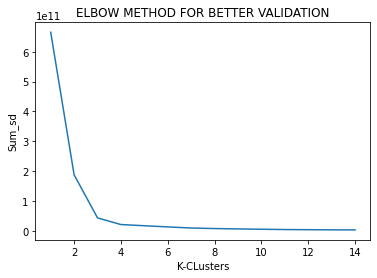

In [99]:
#Plot for Elbow Method
plt.plot(k_range,sum_of_sqr_distance)
plt.xlabel('K-CLusters')
plt.ylabel('Sum_sd')
plt.title('ELBOW METHOD FOR BETTER VALIDATION')
plt.show()

In [100]:
from sklearn.metrics import silhouette_score,silhouette_samples

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km_models3 = KMeans(n_clusters=n_clusters)
    preds = km_models3.fit_predict(df_cust)
    centers = km_models3.cluster_centers_

    score = silhouette_score(df_cust, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6547312337699506)
For n_clusters = 3, silhouette score is 0.7393168519975208)
For n_clusters = 4, silhouette score is 0.7207226021609822)
For n_clusters = 5, silhouette score is 0.6376763323274897)
For n_clusters = 6, silhouette score is 0.5781815657659974)


In [101]:
# Init Model
km3 = KMeans(n_clusters=4)

In [102]:
y_pred = km3.fit_predict(df_cust)

In [103]:
y_pred

array([0, 0, 0, 0, 2, 3, 0, 2, 2, 2, 1, 1, 1, 1, 0, 3, 0, 2, 2, 3, 1, 3,
       0, 2, 3, 3, 3, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 3, 0,
       0, 3, 3, 3, 1, 0, 2, 1, 3, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 3, 3, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 3, 0, 1, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 3, 2, 0, 3, 1, 0, 0, 1, 1, 3, 1, 3, 1, 2, 2, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 3, 2, 1, 2, 2, 2, 1, 3, 0, 2, 0, 0, 1, 0,
       1, 0, 3, 2, 3, 3, 0, 1, 2, 0, 0, 3, 0, 3, 0, 3, 0, 2, 0, 1, 2, 0,
       2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 1, 3, 3, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 3, 1,
       2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 3, 0, 2, 2, 2, 2, 0, 2, 1, 3, 1, 2,
       0, 0, 1, 2, 3, 3, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 3, 0,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 2, 0, 1, 2, 2, 1, 1, 0, 0, 3, 0, 0, 2,
       0, 2, 1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 3, 1, 2,
       2, 1, 3, 2, 2, 3, 0, 1, 1, 0, 1, 2, 2, 1, 0,

In [104]:

km3.cluster_centers_

array([[5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03,
        2.00000000e+00],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04,
        1.00000000e+00],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04,
        4.44089210e-16],
       [4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03,
        3.00000000e+00]])

In [105]:
df_cust.head()

,Age,Income,SpendingScore,Savings,clusters
0,58,77769,0.791329,6559.829923,2
1,59,81799,0.791082,5417.661426,2
2,62,74751,0.702657,9258.992965,2
3,59,74373,0.765680,7346.334504,2
4,87,17760,0.348778,16869.507130,0


In [106]:
df_cust['clusters']=y_pred

In [107]:
df_cust.head()

,Age,Income,SpendingScore,Savings,clusters
0,58,77769,0.791329,6559.829923,0
1,59,81799,0.791082,5417.661426,0
2,62,74751,0.702657,9258.992965,0
3,59,74373,0.765680,7346.334504,0
4,87,17760,0.348778,16869.507130,2


In [108]:
df_cust['clusters'].unique()

array([0, 2, 3, 1], dtype=int32)

In [109]:
df0 = df_cust[df_cust['clusters'] == 0]
df01 = df_cust[df_cust['clusters'] == 1]
df02 = df_cust[df_cust['clusters'] == 2]
df03 = df_cust[df_cust['clusters'] == 3]

Text(0, 0.5, 'Cluster')

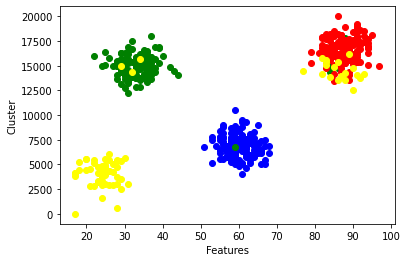

In [110]:
#plot scatter of clusters
plt.scatter(df0['Age'],df0['Savings'],color='blue')
plt.scatter(df01['Age'],df01['Savings'],color='green')
plt.scatter(df02['Age'],df02['Savings'],color='red')
plt.scatter(df03['Age'],df03['Savings'],color='yellow')
plt.xlabel('Features')
plt.ylabel('Cluster')



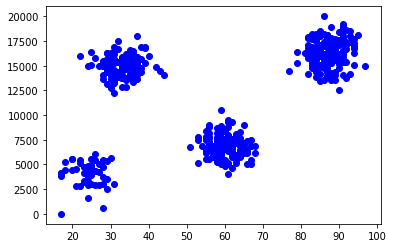

In [111]:
plt.scatter(df_cust['Age'],df_cust['Savings'],color='blue')
plt.show()

In [112]:
km3.cluster_centers_

array([[5.99615385e+01, 7.23328462e+04, 7.71295985e-01, 6.89089329e+03,
        2.00000000e+00],
       [3.54230769e+01, 1.05228392e+05, 3.02152694e-01, 1.49378365e+04,
        1.00000000e+00],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04,
        4.44089210e-16],
       [4.08750000e+01, 1.26031667e+05, 6.54598429e-01, 7.28792610e+03,
        3.00000000e+00]])

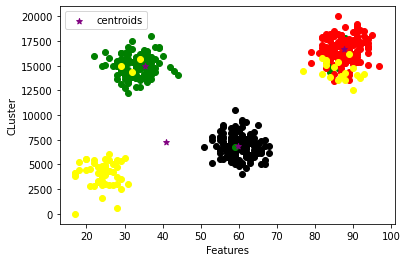

In [113]:
plt.scatter(df0['Age'],df0['Savings'],color='black')
plt.scatter(df01['Age'],df01['Savings'],color='green')
plt.scatter(df02['Age'],df02['Savings'],color='red')
plt.scatter(df03['Age'],df03['Savings'],color='yellow')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,3],color='purple',marker='*',label='centroids')
plt.xlabel('Features')
plt.ylabel('CLuster')
plt.legend()

#Using silhouette plot

In [114]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
def silhouette_plot(X, y, n_clusters, ax=None):
	if ax is None:
		ax = plt.gca()
		# Compute the silhouette scores for each sample
		silhouette_avg = silhouette_score(X, y)
		sample_silhouette_values = silhouette_samples(X, y)
		y_lower = padding = 2
		for i in range(n_clusters):
	# Aggregate the silhouette scores for samples belonging to
			ith_cluster_silhouette_values = sample_silhouette_values[y == i]
			ith_cluster_silhouette_values.sort()
			size_cluster_i = ith_cluster_silhouette_values.shape[0]
			y_upper = y_lower + size_cluster_i
			color = cm.nipy_spectral(float(i) / n_clusters)
			ax.fill_betweenx(np.arange(y_lower, y_upper),
							0,ith_cluster_silhouette_values,
							facecolor=color,
							edgecolor=color,
							alpha=0.7)
			# Label the silhouette plots with their cluster numbers at the middle
			ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
			# Compute the new y_lower for next plot
			y_lower = y_upper + padding
		ax.set_xlabel("The silhouette coefficient values")
		ax.set_ylabel("Cluster label")
		# The vertical line for average silhoutte score of all the values
		ax.axvline(x=silhouette_avg, c='r', alpha=0.8, lw=0.8, ls='-')
		ax.annotate('Average',
					xytext=(silhouette_avg, y_lower * 1.025),
					xy=(0, 0),
					ha='center',
					alpha=0.8,
					c='r')
		ax.set_yticks([]) # Clear the yaxis labels / ticks
		ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
		ax.set_ylim(0, y_upper + 1)
		ax.set_xlim(-0.075, 1.0)
		return ax

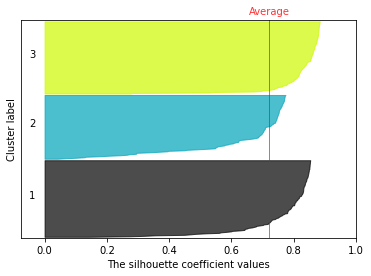

In [115]:
silhouette_plot(df_cust,y_pred,3,ax=None)

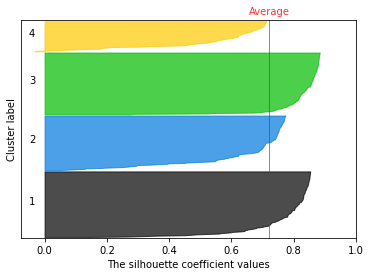

In [116]:
silhouette_plot(df_cust,y_pred,4,ax=None)

DBSCAN
Usefulness
Unsupervised ML
Outlier Detection
Noise detection
Terms
The DBSCAN algorithm uses two parameters:

eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.

minPt >= Dimensions of dataset + 1
Core point — This is a point that has at least m points within distance n from itself.

Border — This is a point that has at least one Core point at a distance n.
Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.
These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

In [117]:
dfj=pd.read_csv('jewellery.csv')

In [118]:
dfj.shape

(505, 4)

In [119]:
dfj.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [120]:
 from sklearn.preprocessing import StandardScaler


In [121]:
X=StandardScaler().fit_transform(dfj)

In [122]:
#INIT Model
from sklearn.cluster import DBSCAN


In [123]:
db=DBSCAN(eps=0.3,min_samples=10)

In [124]:
y_cluster_dbscan=db.fit_predict(X)

In [125]:
y_cluster_dbscan

array([ 0,  0,  0,  0,  1,  4,  0,  1,  1,  1, -1,  2,  2,  2,  0,  3,  0,
        1,  1,  3,  2,  3,  0,  1, -1,  4, -1,  0,  1,  0,  0,  0,  1,  0,
        2,  0,  1,  0,  2,  2,  0,  1,  4,  0,  0,  4,  3,  4,  2,  0,  1,
        2,  4,  1,  0,  1,  2,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1, -1,
        4,  0,  0,  2,  1,  1,  2,  0,  2,  0,  0,  4,  0, -1,  0,  1,  1,
        2,  2,  0,  0,  0,  0,  0,  4,  1,  0,  4,  2,  0,  0,  2,  2,  4,
        2,  4,  2,  1, -1,  2,  2,  0,  1,  2,  0,  2,  2,  2,  0,  2, -1,
        1,  2,  1,  1,  1,  2,  3,  0,  1,  0,  0,  2,  0,  2,  0,  4,  1,
       -1,  4,  0,  2,  1,  0,  0,  4,  0,  4,  0, -1,  0,  1,  0,  2,  1,
        0,  1,  3,  2,  0,  1,  0,  2,  1,  0,  2, -1,  2,  1,  0,  2,  0,
        1,  0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  0,  2,  4,  4,  1,  2,
        0,  0,  0,  2,  1,  0,  0,  0,  1, -1,  2,  1,  1,  1,  2,  0,  2,
        0,  2,  0,  1,  4,  0,  1,  1, -1,  1,  0,  1,  2,  4,  2,  1,  0,
        0,  2,  1,  2,  4

In [126]:
#number of Unique Clusters
set(y_cluster_dbscan)

{-1, 0, 1, 2, 3, 4}

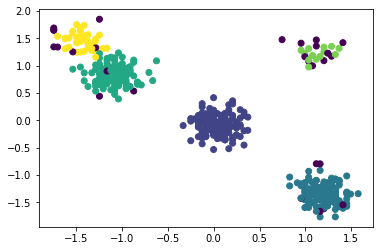

In [127]:
plt.scatter(X[:,0],X[:,1],c=y_cluster_dbscan)

In [128]:
#Number of cluster
labels=db.labels_
n_clusters_=len(set(labels))-(1 if -1 in labels else 0)

In [129]:
n_clusters_

5

In [130]:
#Idnetify Noise
n_noise=list(db.labels_).count(-1)

In [131]:
n_noise

30


Clustering using Hierarchical Clustering
Hierarchical Clustering: the process of building a hierarchy or ordering of clusters till only one cluster is left
Types of Hierarchical Clustering
Additive(Agglomerative) hierarchical clustering

Agglomerate (merge or join)
Assign each point to a cluster
Merge/Join closes pairs of clusters into one
Repeat until you have a single cluster
You keep on adding or joining clusters
Divisive hierarchical clustering

Opposite of Additive
Start with a single large cluster
Divide/Split the farthest point in the cluster
Repeat until each cluster only contains a single data point
Terms
Similarity Distance
Proximity Matrix: it stores the distances between each point
Dendogram: used to find the number of clusters
A dendrogram is a tree-like diagram that records the sequences of merges or splits.
The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
Agglomerative Hierarchical Clustering
Merging clusters
Dendogram to detect n_clusters to use and end at

In [132]:
df_hie=pd.read_csv('jewellery.csv')

In [133]:
df.head()

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [134]:
from sklearn.preprocessing import normalize
scaled_hie=normalize(df_hie)

In [135]:
scaled_hie

array([[7.43159163e-04, 9.96461119e-01, 1.01393661e-05, 8.40516847e-02],
       [7.19703228e-04, 9.97813633e-01, 9.64990343e-06, 6.60865833e-02],
       [8.23129701e-04, 9.92415618e-01, 9.32867431e-06, 1.22925034e-01],
       ...,
       [2.32006579e-03, 9.09904025e-01, 9.15521211e-06, 4.14812347e-01],
       [3.28729403e-03, 7.47082724e-01, 1.28124694e-05, 6.64722948e-01],
       [2.65575069e-03, 9.03164114e-01, 8.63298210e-06, 4.29287235e-01]])

In [136]:
scaled_hie=pd.DataFrame(scaled_hie,columns=df_hie.columns)

In [137]:
scaled_hie

,Age,Income,SpendingScore,Savings
0,0.000743,0.996461,0.000010,0.084052
1,0.000720,0.997814,0.000010,0.066087
2,0.000823,0.992416,0.000009,0.122925
3,0.000789,0.995157,0.000010,0.098298
4,0.003552,0.725046,0.000014,0.688692
...,...,...,...,...
500,0.000274,0.989284,0.000004,0.146006
501,0.003465,0.742750,0.000008,0.669559
502,0.002320,0.909904,0.000009,0.414812
503,0.003287,0.747083,0.000013,0.664723


In [138]:
#Detecting number of clusters using dendogram
import scipy.cluster.hierarchy as shc

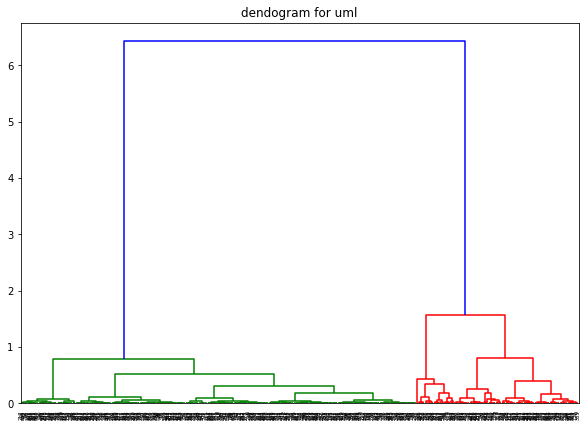

In [139]:
plt.figure(figsize=(10,7))
plt.title('dendogram for uml')
dend=shc.dendrogram(shc.linkage(scaled_hie,method='ward'))

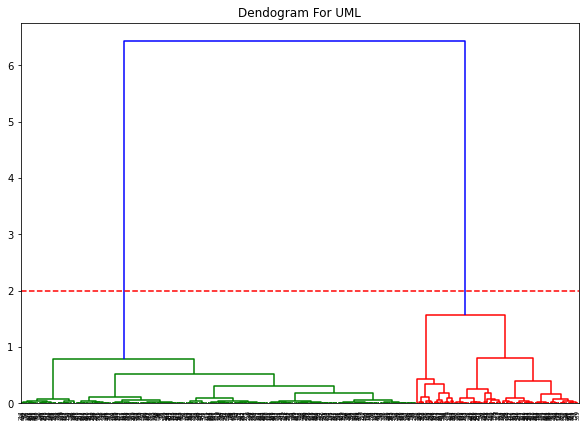

In [140]:
plt.figure(figsize=(10,7))
plt.title("Dendogram For UML")
dend = shc.dendrogram(shc.linkage(scaled_hie,method='ward'))
plt.axhline(y=2,color='r',linestyle='--')

In [141]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_clust_hcl = hcluster.fit_predict(scaled_hie)
y_clust_hcl

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

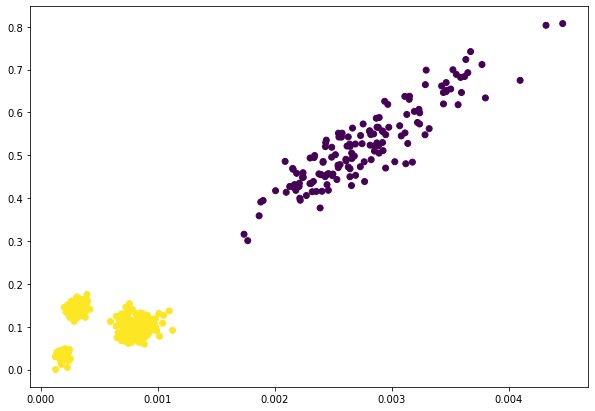

In [142]:
scaled_hie['clusters'] = y_clust_hcl
# Plot
plt.figure(figsize=(10,7))
plt.scatter(scaled_hie['Age'],scaled_hie['Savings'],c=scaled_hie['clusters'])

Clustering using BIRCH
BIRCH stands for Balanced Iterative Reducing and Clustering using Hierarchies
It is a hierarchical clustering algorithm.
It provides a memory-efficient clustering method for large datasets.
Very good for large dataset
Clustering is conducted without scanning all points in a dataset.
The BIRCH algorithm creates Clustering Features (CF) Tree for a given dataset and CF contains the number of sub-clusters that holds only a necessary part of the data. Thus the method does not require to memorize the entire dataset.
Terms
branching_factor: it defines the number of sub-clusters and
threshold: it sets the limit between the sample and sub-cluster.
Benefit
Useful for large dataset
BIRCH can work with any given amount of memory, and the I/O complexity is a little more than one scan of data.

In [143]:

from sklearn.cluster import Birch

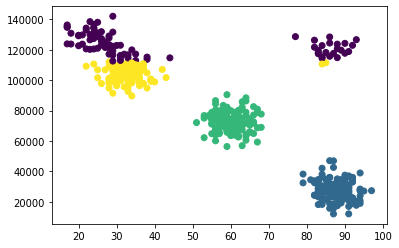

In [144]:
birch_model = Birch(branching_factor=100,threshold=0.5,n_clusters=4)
birch_model.fit(df_hie)
y_clus_bch = birch_model.predict(df_hie)
#scaled_hie['birch']=y_clus_bch
plt.scatter(df_hie['Age'],df_hie['Income'],c=birch_model.labels_)